# League Player Data for a Single Year

Steps
1. Get the league
2. Get the Roster for each team for each week
3. Get the Stats for each player for each week
   

In [210]:
import requests
import xmltodict
from datetime import datetime
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import pprint
pp = pprint.PrettyPrinter(indent=2)

## Get a token
Go to this website, login with Yahoo, and then copy the Access Token
https://lemon-dune-0cd4b231e.azurestaticapps.net/.

Paste the Authentication Toekn in the belown command, replacing the existing token.

In [219]:
token = "2ilAy.HOvV8gcowuSRmGAwD0hku2Jqirhhs1Y5eKg5kPXsbTzHJyPk2LNdgNk1oss4Wx1cxabhqOC.oAJjw.go5gDhdc5FBOT3NGMhhGreRGfTI4qTpzF54jOlt1X1C9r8PsiyI_aHqCmAaBpbWGiYtKgaYi5maqOGqoPy2gKABFk.EWOlma9zR89rAlghQJU7EEvjCwrHTgraKEHbbrEFd4jfiXS5emy26f7sSyixWRrwmVEypKubzEAk3rjx78vWsujlII2BXTAWqvzS7Cb3EaSKKQF_SDgVdyX8fQuONCmDt0jrP6O4xLtM5adbb1sCFa6k6Vmy2Sz4hiLFZw_TvjZLz0xbW8QLYW.eMoieHjFQUlkyEKwAUST4y4PVw0Tv2BcdUaKv5XsXDta3FtVRJv0DS_eWZPjeVVN_cUGFgvoYghRl5iJ2xjBSMAl75zt9RMIRNxEM5S7FH1bX6aFee8Odnjaq2HYFskbxLNYwxrCsZadbldLJ_vaxKEJ1YHzo_IaAmE9_2IBXXppKgUXoRj5exQ35lgBe_iRjWPH07ZU1rP75VbSuXoq0v5f7_Uyv4d7ACC09of3fdBgUSoN.aFC0xEBqAGJ3b.y7CvqNAqhCpMXV3EEqeDEN5KpwwpTn65LLoIKQ2Rx2YcsYYdLtKe8I_BMCg5Qivszi_lYUYU4dY_yiv6QOI1CMD17gZzMXPpy0NgObENFKSXwmYgVaHJwTL.mzFhbR.voyCQNsRN6gvK4FqduzgffthG8Mrn.H4son5NYQN6jVFCxcvHpVMt.8dLKNG5WDfQkWZJw0KIYLXrAsIm5rwqxo1zQMY_oxh8ptwMY0pmlvyLiSB9U7UfHg1eCKpR9lYGlP90e_n9wTeMJgLFXBbiqnzBoxqQKnfj299zLh0gDqNY2zBAchwjxf4HMBGIkuQG3R6a4dRe4ahiin.D_be4Pwl8I2zdEcm2Bc4scP9Zs9hmqKKJmheZv2WdWdXDAfK1l_2Ey78v"
authorization = "Bearer " + token
headers = {'Authorization': authorization}

In [220]:
# This doc assumes a single league key
league_keys = "390.l.99174"
uri = "https://fantasysports.yahooapis.com/fantasy/v2/leagues;league_keys=" + league_keys +";out=teams"
r = requests.get(uri, headers=headers)
teamsContent = xmltodict.parse(r.text)
teamsContent

OrderedDict([('fantasy_content',
              OrderedDict([('@xml:lang', 'en-US'),
                           ('@yahoo:uri',
                            'http://fantasysports.yahooapis.com/fantasy/v2/leagues;league_keys=390.l.99174;out=teams'),
                           ('@time', '172.32990264893ms'),
                           ('@copyright',
                            'Data provided by Yahoo! and STATS, LLC'),
                           ('@refresh_rate', '60'),
                           ('@xmlns:yahoo',
                            'http://www.yahooapis.com/v1/base.rng'),
                           ('@xmlns',
                            'http://fantasysports.yahooapis.com/fantasy/v2/base.rng'),
                           ('leagues',
                            OrderedDict([('@count', '1'),
                                         ('league',
                                          OrderedDict([('league_key',
                                                        '390.l.99174'),
 

Extract teamKeys, startDay, startWeek, endWeek

In [223]:
league = teamsContent["fantasy_content"]["leagues"]["league"]
startDate = datetime.strptime(league["start_date"], '%Y-%m-%d')
startWeek = int(league["start_week"])
endWeek = int(league["end_week"]) # could use current week as end if mid year

teamsData = []
for team in league["teams"]["team"]:
    teamDict = {
        "name": team["name"],
        "team_key": team["team_key"],
        "number_of_moves": int(team["number_of_moves"]),
        "number_of_trades": int(team["number_of_trades"]),
        "clinched_playoffs": "clinched_playoffs" in team and team["clinched_playoffs"] == "1",
        "draft_grade": team["draft_grade"],
        "manager_nickname": team["managers"]["manager"]["nickname"],
        "division_id": team["division_id"]
    }
    teamsData.append(teamDict)
teamsDf = pd.DataFrame(teamsData,
                     columns=['name', 'team_key', 'number_of_moves','number_of_trades','clinched_playoffs','draft_grade','manager_nickname', 'division_id'])
teamsDf

name          team_key  number_of_moves  number_of_trades  \
0    Professor Teabag   390.l.99174.t.1               33                 2   
1               Champ   390.l.99174.t.2               27                 0   
2      Bottom Bitches   390.l.99174.t.3               31                 2   
3         Hareem Kunt   390.l.99174.t.4               39                 1   
4      Salmon Sisters   390.l.99174.t.5               40                 4   
5         Hike School   390.l.99174.t.6               21                 2   
6  1503 Sequoia Trail   390.l.99174.t.7               26                 0   
7       Burrito House   390.l.99174.t.8               42                 1   
8       Pepper Brooks   390.l.99174.t.9               37                 1   
9             Bulgogi  390.l.99174.t.10               27                 1   

   clinched_playoffs draft_grade manager_nickname division_id  
0               True          C+           Miccyd           2  
1               True           B        Simon Kim           2  
2              False           B         Justin B           1  
3               True           C      Paul Masini           2  
4               True           B           Matt M           2  
5               True           C         J Remedy           1  
6              False           A          Chris A           1  
7              False          B+           Greg A           1  
8              False          B+              Sam           2  
9               True          A-           Robert           1

Get the roster for each team for each week

In [1]:
teamKeys = ",".join(teamsDf["team_key"])
baseUri = "https://fantasysports.yahooapis.com/fantasy/v2/teams;team_keys=" + teamKeys + "/roster"
contents = []
for i in range(startWeek, endWeek + 1):
    uri = baseUri + ";week=" + str(i)
    r = requests.get(uri, headers=headers)
    if (r.status_code != 200):
        pp.pprint(r)
    content = xmltodict.parse(r.text)
    contents.append(content)
contents

NameError: name 'teamsDf' is not defined

In [61]:
playerDicts = []
for content in contents:
    for team in content["fantasy_content"]["teams"]["team"]:
        teamKey = team["team_key"]
        teamName = team["name"]
        week = team["roster"]["week"]
        for player in team["roster"]["players"]["player"]:
            playerDict = {
                "player_key": player["player_key"],
                "name": player["name"]["full"],
                "position": player["primary_position"],
                "nfl_team": player["editorial_team_abbr"],
                "week": int(player["selected_position"]["week"]),
                "started": player["selected_position"]['position'] == player["primary_position"] or player["selected_position"]['is_flex'] == '1',
                "team_key": teamKey,
                "team_name": teamName
            }
            playerDicts.append(playerDict)
playersDf = pd.DataFrame(playerDicts,
                     columns=['player_key', 'name', 'week', 'position','team_key', 'team_name','started', 'nfl_team'])
playersDf.head(50)

player_key                name  week position         team_key  \
0    390.p.31002       Lamar Jackson     1       QB  390.l.99174.t.1   
1    390.p.25812        Kirk Cousins     1       QB  390.l.99174.t.1   
2    390.p.26650     DeAndre Hopkins     1       WR  390.l.99174.t.1   
3    390.p.24793         Julio Jones     1       WR  390.l.99174.t.1   
4    390.p.27589   Allen Robinson II     1       WR  390.l.99174.t.1   
5    390.p.27631     Devonta Freeman     1       RB  390.l.99174.t.1   
6    390.p.30362        Chris Carson     1       RB  390.l.99174.t.1   
7    390.p.29269        Hunter Henry     1       TE  390.l.99174.t.1   
8    390.p.24815      Mark Ingram II     1       RB  390.l.99174.t.1   
9    390.p.24791          A.J. Green     1       WR  390.l.99174.t.1   
10    390.p.6763       Philip Rivers     1       QB  390.l.99174.t.1   
11   390.p.31104       Chase Edmonds     1       RB  390.l.99174.t.1   
12   390.p.31221      Justin Jackson     1       RB  390.l.99174.t.1   
13   390.p.28493     Jamison Crowder     1       WR  390.l.99174.t.1   
14   390.p.25881       Greg Zuerlein     1        K  390.l.99174.t.1   
15  390.p.100033           Baltimore     1      DEF  390.l.99174.t.1   
16   390.p.29235          Jared Goff     1       QB  390.l.99174.t.2   
17   390.p.30115   Mitchell Trubisky     1       QB  390.l.99174.t.2   
18   390.p.29281      Michael Thomas     1       WR  390.l.99174.t.2   
19   390.p.26699        Keenan Allen     1       WR  390.l.99174.t.2   
20   390.p.27591       Jarvis Landry     1       WR  390.l.99174.t.2   
21   390.p.26671        Le'Veon Bell     1       RB  390.l.99174.t.2   
22   390.p.30256         Marlon Mack     1       RB  390.l.99174.t.2   
23    390.p.7924      Delanie Walker     1       TE  390.l.99174.t.2   
24   390.p.25755      Alshon Jeffery     1       WR  390.l.99174.t.2   
25   390.p.27538          Eric Ebron     1       TE  390.l.99174.t.2   
26   390.p.31029       Derrius Guice     1       RB  390.l.99174.t.2   
27   390.p.24057    Emmanuel Sanders     1       WR  390.l.99174.t.2   
28    390.p.8795          Joe Flacco     1       QB  390.l.99174.t.2   
29   390.p.27618      Donte Moncrief     1       WR  390.l.99174.t.2   
30   390.p.26534       Justin Tucker     1        K  390.l.99174.t.2   
31  390.p.100014         Los Angeles     1      DEF  390.l.99174.t.2   
32   390.p.30971      Baker Mayfield     1       QB  390.l.99174.t.3   
33    390.p.5228           Tom Brady     1       QB  390.l.99174.t.3   
34   390.p.27540   Odell Beckham Jr.     1       WR  390.l.99174.t.3   
35    390.p.9496      Julian Edelman     1       WR  390.l.99174.t.3   
36   390.p.28691     Tyrell Williams     1       WR  390.l.99174.t.3   
37   390.p.31001         Sony Michel     1       RB  390.l.99174.t.3   
38   390.p.29238     Ezekiel Elliott     1       RB  390.l.99174.t.3   
39   390.p.30132         O.J. Howard     1       TE  390.l.99174.t.3   
40   390.p.31905    David Montgomery     1       RB  390.l.99174.t.3   
41   390.p.24171       Antonio Brown     1       WR  390.l.99174.t.3   
42   390.p.31833        Kyler Murray     1       QB  390.l.99174.t.3   
43   390.p.31945        Justice Hill     1       RB  390.l.99174.t.3   
44   390.p.31030    James Washington     1       WR  390.l.99174.t.3   
45   390.p.27619          John Brown     1       WR  390.l.99174.t.3   
46   390.p.27369         Brett Maher     1        K  390.l.99174.t.3   
47  390.p.100021        Philadelphia     1      DEF  390.l.99174.t.3   
48   390.p.30123     Patrick Mahomes     1       QB  390.l.99174.t.4   
49    390.p.6770  Ben Roethlisberger     1       QB  390.l.99174.t.4   

           team_name  started nfl_team  
0   Professor Teabag     True      Bal  
1   Professor Teabag     True      Min  
2   Professor Teabag     True      Ari  
3   Professor Teabag     True      Atl  
4   Professor Teabag     True      Chi  
5   Professor Teabag     True      Atl  
6   Professor Teabag     True      Sea  
7   P

Get Unique Player Keys. Get Stats for all unique player keys

In [81]:
playerKeys = playersDf.player_key.unique()
contents = []
for week in range(startWeek, endWeek + 1):
    # max page size is 25
    print(str(week))
    for i in range(0,len(playerKeys),25):
        print(str(i))
        playerKeysStr = ",".join(playerKeys[i:i+25])
        uri = "https://fantasysports.yahooapis.com/fantasy/v2/leagues;league_keys=" + league_keys + "/players;player_keys=" + playerKeysStr + "/stats;type=week;week=" + str(week)   
        r = requests.get(uri, headers=headers)
        pp.pprint(r)
        content = xmltodict.parse(r.text)
        contents.append(content)

1
0
<Response [200]>
25
<Response [200]>
50
<Response [200]>
75
<Response [200]>
100
<Response [200]>
125
<Response [200]>
150
<Response [200]>
175
<Response [200]>
200
<Response [200]>
225
<Response [200]>
250
<Response [200]>
275
<Response [200]>
2
0
<Response [200]>
25
<Response [200]>
50
<Response [200]>
75
<Response [200]>
100
<Response [200]>
125
<Response [200]>
150
<Response [200]>
175
<Response [200]>
200
<Response [200]>
225
<Response [200]>
250
<Response [200]>
275
<Response [200]>
3
0
<Response [200]>
25
<Response [200]>
50
<Response [200]>
75
<Response [200]>
100
<Response [200]>
125
<Response [200]>
150
<Response [200]>
175
<Response [200]>
200
<Response [200]>
225
<Response [200]>
250
<Response [200]>
275
<Response [200]>
4
0
<Response [200]>
25
<Response [200]>
50
<Response [200]>
75
<Response [200]>
100
<Response [200]>
125
<Response [200]>
150
<Response [200]>
175
<Response [200]>
200
<Response [200]>
225
<Response [200]>
250
<Response [200]>
275
<Response [200]>
5
0


Get the stat names from league settings

In [226]:
uri = "https://fantasysports.yahooapis.com/fantasy/v2/leagues;league_keys=" + league_keys + "/settings"   
r = requests.get(uri, headers=headers)
pp.pprint(r)
settings = xmltodict.parse(r.text)
settings

<Response [200]>


OrderedDict([('fantasy_content',
              OrderedDict([('@xml:lang', 'en-US'),
                           ('@yahoo:uri',
                            'http://fantasysports.yahooapis.com/fantasy/v2/leagues;league_keys=390.l.99174/settings'),
                           ('@time', '20.731925964355ms'),
                           ('@copyright',
                            'Data provided by Yahoo! and STATS, LLC'),
                           ('@refresh_rate', '60'),
                           ('@xmlns:yahoo',
                            'http://www.yahooapis.com/v1/base.rng'),
                           ('@xmlns',
                            'http://fantasysports.yahooapis.com/fantasy/v2/base.rng'),
                           ('leagues',
                            OrderedDict([('@count', '1'),
                                         ('league',
                                          OrderedDict([('league_key',
                                                        '390.l.99174'),
  

In [166]:
positions = []
for position in settings['fantasy_content']['leagues']['league']['settings']['roster_positions']['roster_position']:
    for i in range(0,int(position['count'])):
        positions.append(position['position'])
positions

['QB',
 'QB',
 'WR',
 'WR',
 'WR',
 'RB',
 'RB',
 'TE',
 'W/R/T',
 'K',
 'DEF',
 'BN',
 'BN',
 'BN',
 'BN',
 'BN']

In [96]:
statIdToStatName = {}
for stat in settings["fantasy_content"]["leagues"]["league"]["settings"]["stat_categories"]["stats"]["stat"]:
    statIdToStatName[stat['stat_id']] = stat['name']
statIdToStatName



{'4': 'Passing Yards',
 '5': 'Passing Touchdowns',
 '6': 'Interceptions',
 '8': 'Rushing Attempts',
 '9': 'Rushing Yards',
 '10': 'Rushing Touchdowns',
 '78': 'Targets',
 '11': 'Receptions',
 '12': 'Receiving Yards',
 '13': 'Receiving Touchdowns',
 '15': 'Return Touchdowns',
 '16': '2-Point Conversions',
 '18': 'Fumbles Lost',
 '19': 'Field Goals 0-19 Yards',
 '20': 'Field Goals 20-29 Yards',
 '21': 'Field Goals 30-39 Yards',
 '22': 'Field Goals 40-49 Yards',
 '23': 'Field Goals 50+ Yards',
 '24': 'Field Goals Missed 0-19 Yards',
 '25': 'Field Goals Missed 20-29 Yards',
 '29': 'Point After Attempt Made',
 '30': 'Point After Attempt Missed',
 '31': 'Points Allowed',
 '32': 'Sack',
 '33': 'Interception',
 '34': 'Fumble Recovery',
 '35': 'Touchdown',
 '36': 'Safety',
 '37': 'Block Kick',
 '49': 'Kickoff and Punt Return Touchdowns',
 '67': '4th Down Stops',
 '50': 'Points Allowed 0 points',
 '51': 'Points Allowed 1-6 points',
 '52': 'Points Allowed 7-13 points',
 '53': 'Points Allowed 14-2

In [112]:
import ast

In [153]:
playerStatsDicts = []
for content in contents:
    for player in content["fantasy_content"]["leagues"]["league"]["players"]["player"]:
        playerStatsDict = {
            'player_key': player["player_key"],
            'week': int(player["player_stats"]["week"]),
            'points': float(player["player_points"]["total"]),
            'name': player["name"]["full"]
        }
        for stat in player["player_stats"]["stats"]["stat"]:
            stat_name = statIdToStatName[stat['stat_id']]
            stat_value = ast.literal_eval(stat['value'])
            playerStatsDict[stat_name] = stat_value
        playerStatsDicts.append(playerStatsDict)
playerStatsDf = pd.DataFrame(playerStatsDicts)
playerStatsDf.head(50)

player_key  week  points                name  Passing Yards  \
0    390.p.31002     1   29.86       Lamar Jackson          324.0   
1    390.p.25812     1   13.20        Kirk Cousins           98.0   
2    390.p.26650     1   29.10     DeAndre Hopkins            0.0   
3    390.p.24793     1   12.10         Julio Jones            0.0   
4    390.p.27589     1   15.70   Allen Robinson II            0.0   
5    390.p.27631     1    1.60     Devonta Freeman            0.0   
6    390.p.30362     1   20.00        Chris Carson            0.0   
7    390.p.29269     1    8.00        Hunter Henry            0.0   
8    390.p.24815     1   24.70      Mark Ingram II            0.0   
9    390.p.24791     1    0.00          A.J. Green            0.0   
10    390.p.6763     1   20.11       Philip Rivers          333.0   
11   390.p.31104     1    0.50       Chase Edmonds            0.0   
12   390.p.31221     1    6.60      Justin Jackson            0.0   
13   390.p.28493     1   17.30     Jamison Crowder            0.0   
14   390.p.25881     1   15.00       Greg Zuerlein            NaN   
15  390.p.100033     1   15.00           Baltimore            NaN   
16   390.p.29235     1    7.31          Jared Goff          186.0   
17   390.p.30115     1    5.61   Mitchell Trubisky          228.0   
18   390.p.29281     1   19.30      Michael Thomas            0.0   
19   390.p.26699     1   24.30        Keenan Allen            0.0   
20   390.p.27591     1    9.70       Jarvis Landry            0.0   
21   390.p.26671     1   20.20        Le'Veon Bell            0.0   
22   390.p.30256     1   30.40         Marlon Mack            0.0   
23    390.p.7924     1   20.00      Delanie Walker            0.0   
24   390.p.25755     1   19.60      Alshon Jeffery            0.0   
25   390.p.27538     1    1.30          Eric Ebron            0.0   
26   390.p.31029     1    5.30       Derrius Guice            0.0   
27   390.p.24057     1   17.10    Emmanuel Sanders            0.0   
28    390.p.8795     1   11.76          Joe Flacco          268.0   
29   390.p.27618     1    2.20      Donte Moncrief            0.0   
30   390.p.26534     1   11.00       Justin Tucker            NaN   
31  390.p.100014     1    9.00         Los Angeles            NaN   
32   390.p.30971     1    6.14      Baker Mayfield          285.0   
33    390.p.5228     1   21.74           Tom Brady          341.0   
34   390.p.27540     1   10.60   Odell Beckham Jr.            0.0   
35    390.p.9496     1   13.01      Julian Edelman           32.0   
36   390.p.28691     1   21.50     Tyrell Williams            0.0   
37   390.p.31001     1    1.40         Sony Michel            0.0   
38   390.p.29238     1   12.80     Ezekiel Elliott            0.0   
39   390.p.30132     1    2.20         O.J. Howard            0.0   
40   390.p.31905     1    5.00    David Montgomery            0.0   
41   390.p.24171     1    0.00       Antonio Brown            0.0   
42   390.p.31833     1   18.10        Kyler Murray          308.0   
43   390.p.31945     1    2.70        Justice Hill            0.0   
44   390.p.31030     1    6.10    James Washington            0.0   
45   390.p.27619     1   23.80          John Brown            0.0   
46   390.p.27369     1    5.00         Brett Maher            NaN   
47  390.p.100021     1    1.00        Philadelphia            NaN   
48   390.p.30123     1   26.00     Patrick Mahomes          378.0   
49    390.p.6770     1    6.59  Ben Roethlisberger          276.0   

    Passing Touchdowns  Interceptions  Rushing Attempts  Rushing Yards  \
0                  5.0            0.0               3.0            6.0   
1                  1.0            0.0               6.0            4.0   
2                  0.0            0.0               0.0            0.0   
3                  0.0            0.0               0.0            0.0   
4                  0.0            0.0               0.0            0.0   
5                  0.0            0.0     

In [154]:
fullPlayersDf = pd.merge(playersDf, playerStatsDf, how='outer', left_on=['player_key','week', 'name'], right_on = ['player_key', 'week', 'name'])

In [156]:
fullPlayersDf.tail(50)

player_key                name  week position team_key team_name  \
4398  390.p.100002             Buffalo    16      NaN      NaN       NaN   
4399   390.p.30253   Wayne Gallman Jr.    16      NaN      NaN       NaN   
4400   390.p.27560   Teddy Bridgewater    16      NaN      NaN       NaN   
4401   390.p.31090         Will Dissly    16      NaN      NaN       NaN   
4402   390.p.31046       Mason Rudolph    16      NaN      NaN       NaN   
4403   390.p.26813        Rex Burkhead    16      NaN      NaN       NaN   
4404   390.p.31301          Kyle Allen    16      NaN      NaN       NaN   
4405  390.p.100030        Jacksonville    16      NaN      NaN       NaN   
4406   390.p.31135      Jaylen Samuels    16      NaN      NaN       NaN   
4407    390.p.9678        Chase Daniel    16      NaN      NaN       NaN   
4408   390.p.26060        Cole Beasley    16      NaN      NaN       NaN   
4409   390.p.28685          Josh Lambo    16      NaN      NaN       NaN   
4410   390.p.31008     Ronald Jones II    16      NaN      NaN       NaN   
4411    390.p.8447        Mason Crosby    16      NaN      NaN       NaN   
4412   390.p.28417  Phillip Dorsett II    16      NaN      NaN       NaN   
4413   390.p.32238        Jon Hilliman    16      NaN      NaN       NaN   
4414   390.p.30157      Gerald Everett    16      NaN      NaN       NaN   
4415   390.p.24070        Jimmy Graham    16      NaN      NaN       NaN   
4416   390.p.31077       Chris Herndon    16      NaN      NaN       NaN   
4417   390.p.31223          Auden Tate    16      NaN      NaN       NaN   
4418   390.p.25793        Mohamed Sanu    16      NaN      NaN       NaN   
4419    390.p.8544          Matt Moore    16      NaN      NaN       NaN   
4420   390.p.32018          Ty Johnson    16      NaN      NaN       NaN   
4421    390.p.9037      Danny Amendola    16      NaN      NaN       NaN   
4422   390.p.28188       Chris Boswell    16      NaN      NaN       NaN   
4423   390.p.31082         Mark Walton    16      NaN      NaN       NaN   
4424   390.p.30213         Jonnu Smith    16      NaN      NaN       NaN   
4425   390.p.28537           Jay Ajayi    16      NaN      NaN       NaN   
4426   390.p.31898     Diontae Johnson    16      NaN      NaN       NaN   
4427   390.p.31012        Mike Gesicki    16      NaN      NaN       NaN   
4428   390.p.32417    Chase McLaughlin    16      NaN      NaN       NaN   
4429   390.p.31852           Noah Fant    16      NaN      NaN       NaN   
4430   390.p.31329        Ross Dwelley    16      NaN      NaN       NaN   
4431    390.p.9547         Brian Hoyer    16      NaN      NaN       NaN   
4432    390.p.6405        Jason Witten    16      NaN      NaN       NaN   
4433   390.p.26612        Darren Fells    16      NaN      NaN       NaN   
4434   390.p.31749       Jaeden Graham    16      NaN      NaN       NaN   
4435   390.p.29435       Brandon Allen    16      NaN      NaN       NaN   
4436   390.p.30230       Josh Reynolds    16      NaN      NaN       NaN   
4437   390.p.29650       J.D. McKissic    16      NaN      NaN       NaN   
4438   390.p.30269          Brian Hill    16      NaN      NaN       NaN   
4439   390.p.26824        Ryan Griffin    16      NaN      NaN       NaN   
4440   390.p.29441        Jeff Driskel    16      NaN      NaN       NaN   
4441   390.p.32002      Austin Seibert    16      NaN      NaN       NaN   
4442  390.p.100008             Detroit    16      NaN      NaN       NaN   
4443    390.p.8432           Nick Folk    16      NaN      NaN       NaN   
4444   390.p.29390   Jonathan Williams    16      NaN      NaN       NaN   
4445   390.p.31206       Bo Scarbrough    16      NaN      NaN       NaN   
4446   390.p.27299          Jack Doyle    16      NaN      NaN       NaN   
4447   390.p.31874           Drew Lock    16      NaN      NaN       NaN   

     started nfl_team  points  Passing Yards  ...  \
4398     NaN      NaN    3.50            NaN  ...   
4399     NaN      NaN    

In [157]:
fullPlayersDf.to_csv("players2019.csv", index=False)

In [224]:
teamsDf.to_csv("teams2019.csv", index=False)

In [123]:
uri = "https://fantasysports.yahooapis.com/fantasy/v2/leagues;league_keys=" + league_keys +";out=transactions"
r = requests.get(uri, headers=headers)
content = xmltodict.parse(r.text)
content

OrderedDict([('fantasy_content',
              OrderedDict([('@xml:lang', 'en-US'),
                           ('@yahoo:uri',
                            'http://fantasysports.yahooapis.com/fantasy/v2/leagues;league_keys=390.l.99174;out=transactions'),
                           ('@time', '149.43599700928ms'),
                           ('@copyright',
                            'Data provided by Yahoo! and STATS, LLC'),
                           ('@refresh_rate', '60'),
                           ('@xmlns:yahoo',
                            'http://www.yahooapis.com/v1/base.rng'),
                           ('@xmlns',
                            'http://fantasysports.yahooapis.com/fantasy/v2/base.rng'),
                           ('leagues',
                            OrderedDict([('@count', '1'),
                                         ('league',
                                          OrderedDict([('league_key',
                                                        '390.l.991

In [147]:
trades = [trade for trade in content["fantasy_content"]["leagues"]["league"]["transactions"]["transaction"] if trade["type"] == "trade"]
tradeDicts = []

for trade in trades:
    traderPlayerKeysReceived = []
    tradeePlayerKeysReceived = []
    traderPlayerNamesReceived = []
    tradeePlayerNamesReceived = []
    traderPicksReceived = []
    tradeePicksReceived = []
    traderTeamKey = trade["trader_team_key"]
    if "players" in trade:
        players = trade["players"]["player"]
        # single instance if only one player traded    
        if not isinstance(players, list):
            players = [players]
        for player in players:
            name = player["name"]["full"]
            playerKey = player["player_key"]
            if player["transaction_data"]["destination_team_key"] == traderTeamKey:
                traderPlayerNamesReceived.append(name)
                traderPlayerKeysReceived.append(playerKey)
            else:
                tradeePlayerNamesReceived.append(name)
                tradeePlayerKeysReceived.append(playerKey)
    if "picks" in trade:
        for pick in trade["picks"]["pick"]:
            pickRound = int(pick["round"])
            if pick["destination_team_key"] == traderTeamKey:
                traderPicksReceived.append(pickRound)
            else:
                tradeePicksReceived.append(pickRound)
    timestamp = int(trade["timestamp"])
    date = datetime.fromtimestamp(timestamp)
    delta = date - startDate
    week_enacted = delta.days // 7
    tradeDict = {
        "trader_team_key": traderTeamKey,
        "trader_team_name": trade["trader_team_name"],
        "tradee_team_key": trade["tradee_team_key"],
        "tradee_team_name": trade["tradee_team_name"],
        "trader_player_keys_received": traderPlayerKeysReceived,
        "trader_player_names_received": traderPlayerNamesReceived,
        "tradee_player_keys_received": tradeePlayerKeysReceived,
        "tradee_player_names_received": tradeePlayerNamesReceived,
        "trader_picks_received": traderPicksReceived,
        "tradee_picks_received": tradeePicksReceived,
        "week_enacted": week_enacted,
        "date": date
    }
    tradeDicts.append(tradeDict)
tradesDf = pd.DataFrame(tradeDicts)
tradesDf


trader_team_key trader_team_name   tradee_team_key  tradee_team_name  \
0  390.l.99174.t.5   Salmon Sisters   390.l.99174.t.6       Hike School   
1  390.l.99174.t.4      Hareem Kunt   390.l.99174.t.6       Hike School   
2  390.l.99174.t.3   Bottom Bitches   390.l.99174.t.1  Professor Teabag   
3  390.l.99174.t.5   Salmon Sisters   390.l.99174.t.3    Bottom Bitches   
4  390.l.99174.t.9    Pepper Brooks   390.l.99174.t.1  Professor Teabag   
5  390.l.99174.t.8    Burrito House   390.l.99174.t.5    Salmon Sisters   
6  390.l.99174.t.5   Salmon Sisters  390.l.99174.t.10           Bulgogi   

               trader_player_keys_received  \
0               [390.p.29325, 390.p.31902]   
1                [390.p.31379, 390.p.9265]   
2                                       []   
3               [390.p.29315, 390.p.28691]   
4  [390.p.30362, 390.p.27631, 390.p.24791]   
5                                       []   
6               [390.p.30154, 390.p.31934]   

                  trader_player_names_received  \
0     [Jacoby Brissett, Darrell Henderson Jr.]   
1          [Phillip Lindsay, Matthew Stafford]   
2                                           []   
3             [Austin Hooper, Tyrell Williams]   
4  [Chris Carson, Devonta Freeman, A.J. Green]   
5                                           []   
6            [Dalvin Cook, Alexander Mattison]   

               tradee_player_keys_received  \
0               [390.p.30973, 390.p.31906]   
1               [390.p.31005, 390.p.29325]   
2                            [390.p.29238]   
3               [390.p.31010, 390.p.31012]   
4  [390.p.30994, 390.p.30121, 390.p.30552]   
5                            [390.p.29399]   
6               [390.p.30161, 390.p.29279]   

                   tradee_player_names_received trader_picks_received  \
0               [Sam Darnold, Devin Singletary]                    []   
1                 [Nick Chubb, Jacoby Brissett]                    []   
2                             [Ezekiel Elliott]                   [3]   
3              [Courtland Sutton, Mike Gesicki]                    []   
4  [DJ Moore, Christian McCaffrey, Matt Breida]                    []   
5                                 [Tyreek Hill]               [3, 11]   
6                    [Joe Mixon, Derrick Henry]                    []   

  tradee_picks_received  week_enacted                date  
0                    []             9 2019-11-09 15:50:27  
1                    []             9 2019-11-08 10:07:08  
2                  [16]             8 2019-11-06 19:10:57  
3                    []             8 2019-11-06 18:17:05  
4                    []             8 2019-11-02 11:14:21  
5              [13, 16]             8 2019-10-31 13:47:56  
6                    []             3 2019-09-26 15:38:55

In [148]:
tradesDf.to_csv("trades2019.csv", index=False)

In [169]:
teamKeys = ",".join(teamsDf["team_key"])
uri = "https://fantasysports.yahooapis.com/fantasy/v2/teams;team_keys=" + teamKeys + "/matchups"
r = requests.get(uri, headers=headers)
content = xmltodict.parse(r.text)
content

OrderedDict([('fantasy_content',
              OrderedDict([('@xml:lang', 'en-US'),
                           ('@yahoo:uri',
                            'http://fantasysports.yahooapis.com/fantasy/v2/teams;team_keys=390.l.99174.t.1,390.l.99174.t.2,390.l.99174.t.3,390.l.99174.t.4,390.l.99174.t.5,390.l.99174.t.6,390.l.99174.t.7,390.l.99174.t.8,390.l.99174.t.9,390.l.99174.t.10/matchups'),
                           ('@time', '1996.9830513ms'),
                           ('@copyright',
                            'Data provided by Yahoo! and STATS, LLC'),
                           ('@refresh_rate', '60'),
                           ('@xmlns:yahoo',
                            'http://www.yahooapis.com/v1/base.rng'),
                           ('@xmlns',
                            'http://fantasysports.yahooapis.com/fantasy/v2/base.rng'),
                           ('teams',
                            OrderedDict([('@count', '10'),
                                         ('team',
     

In [194]:
matchupDicts = []
for team in content["fantasy_content"]["teams"]["team"]:
    if team["name"] == "Hike School":
        pp.pprint(team)
    for matchup in team["matchups"]["matchup"]:
        team_1 = matchup["teams"]["team"][0]
        if team["team_key"] != team_1["team_key"]:
            print("Assumption Failed")
        matchupDict = {
            "week": int(matchup['week']),
            "is_playoffs": matchup["is_playoffs"] == "1",
            "is_consolation": matchup["is_consolation"] == "1",
            "team_1_key": team_1["team_key"],
            "team_1_name": team_1["name"],
            "team_1_points": float(team_1["team_points"]["total"]),
            "team_1_projected_points": float(team_1["team_projected_points"]["total"])
        }
        if matchup["teams"]["@count"] == "1":
            matchupDict["is_bye"] = True
        else:
            matchupDict["is_bye"] = False
            team_2 = matchup["teams"]["team"][1]
            matchupDict["team_2_key"] = team_2["team_key"]
            matchupDict["team_2_name"] = team_2["name"]
            matchupDict["team_2_points"] = team_2["team_points"]["total"]
            matchupDict["team_2_projected_points"] = team_2["team_projected_points"]["total"]
        matchupDicts.append(matchupDict)
matchupsDf = pd.DataFrame(matchupDicts)
matchupsDf

OrderedDict([ ('team_key', '390.l.99174.t.6'),
              ('team_id', '6'),
              ('name', 'Hike School'),
              ( 'url',
                'https://football.fantasysports.yahoo.com/2019/f1/99174/6'),
              ( 'team_logos',
                OrderedDict([ ( 'team_logo',
                                OrderedDict([ ('size', 'large'),
                                              ( 'url',
                                                'https://yahoofantasysports-res.cloudinary.com/image/upload/t_s192sq/fantasy-logos/37148768855_a66383.jpg')]))])),
              ('division_id', '1'),
              ('waiver_priority', '7'),
              ('number_of_moves', '21'),
              ('number_of_trades', '2'),
              ( 'roster_adds',
                OrderedDict([ ('coverage_type', 'week'),
                              ('coverage_value', '17'),
                              ('value', '0')])),
              ('clinched_playoffs', '1'),
              ('league_scoring_

                                                                                    OrderedDict([ ( 'coverage_type',
                                                                                                    'week'),
                                                                                                  ( 'coverage_value',
                                                                                                    '17'),
                                                                                                  ( 'value',
                                                                                                    '0')])),
                                                                                  ( 'clinched_playoffs',
                                                                                    '1'),
                                                                                  ( 'league_scoring_type',
                             

                                                                                                                  ( 'email',
                                                                                                                    'j.vollen@yahoo.com'),
                                                                                                                  ( 'image_url',
                                                                                                                    'https://s.yimg.com/ag/images/default_user_profile_pic_64sq.jpg')]))])),
                                                                                  ( 'win_probability',
                                                                                    '0.99'),
                                                                                  ( 'team_points',
                                                                                    OrderedDict([ ( 'coverage_type',
      

                                                                                  ( 'has_draft_grade',
                                                                                    '1'),
                                                                                  ( 'draft_grade',
                                                                                    'C+'),
                                                                                  ( 'draft_recap_url',
                                                                                    'https://football.fantasysports.yahoo.com/2019/f1/99174/1/draftrecap'),
                                                                                  ( 'managers',
                                                                                    OrderedDict([ ( 'manager',
                                                                                                    OrderedDict([ ( 'manager_id',
                     

                                                                                    '5'),
                                                                                  ( 'number_of_moves',
                                                                                    '31'),
                                                                                  ( 'number_of_trades',
                                                                                    '2'),
                                                                                  ( 'roster_adds',
                                                                                    OrderedDict([ ( 'coverage_type',
                                                                                                    'week'),
                                                                                                  ( 'coverage_value',
                                                                               

                                                ('is_playoffs', '0'),
                                                ('is_consolation', '0'),
                                                ( 'is_matchup_recap_available',
                                                  '1'),
                                                ( 'matchup_recap_url',
                                                  'https://football.fantasysports.yahoo.com/2019/f1/99174/recap?week=12&mid1=6&mid2=2'),
                                                ( 'matchup_recap_title',
                                                  'Hike School defeat Champ '
                                                  'for fourth straight win in '
                                                  '169.95-120.84 rout'),
                                                ( 'matchup_grades',
                                                  OrderedDict([ ( 'matchup_grade',
                                                          

                                                                                    'https://football.fantasysports.yahoo.com/2019/f1/99174/2/draftrecap'),
                                                                                  ( 'managers',
                                                                                    OrderedDict([ ( 'manager',
                                                                                                    OrderedDict([ ( 'manager_id',
                                                                                                                    '2'),
                                                                                                                  ( 'nickname',
                                                                                                                    'Simon '
                                                                                                                    'Kim'),
        

                                                                                  ( 'name',
                                                                                    'Hike '
                                                                                    'School'),
                                                                                  ( 'url',
                                                                                    'https://football.fantasysports.yahoo.com/2019/f1/99174/6'),
                                                                                  ( 'team_logos',
                                                                                    OrderedDict([ ( 'team_logo',
                                                                                                    OrderedDict([ ( 'size',
                                                                                                                    'large'),
                        

week  is_playoffs  is_consolation        team_1_key       team_1_name  \
0       1        False           False   390.l.99174.t.1  Professor Teabag   
1       2        False           False   390.l.99174.t.1  Professor Teabag   
2       3        False           False   390.l.99174.t.1  Professor Teabag   
3       4        False           False   390.l.99174.t.1  Professor Teabag   
4       5        False           False   390.l.99174.t.1  Professor Teabag   
..    ...          ...             ...               ...               ...   
147    12        False           False  390.l.99174.t.10           Bulgogi   
148    13        False           False  390.l.99174.t.10           Bulgogi   
149    14         True           False  390.l.99174.t.10           Bulgogi   
150    15         True           False  390.l.99174.t.10           Bulgogi   
151    16         True           False  390.l.99174.t.10           Bulgogi   

     team_1_points  team_1_projected_points  is_bye       team_2_key  \
0           184.26                   149.72   False  390.l.99174.t.9   
1           121.24                   152.38   False  390.l.99174.t.2   
2           168.72                   150.28   False  390.l.99174.t.3   
3           115.72                   147.02   False  390.l.99174.t.6   
4           111.33                   142.75   False  390.l.99174.t.4   
..             ...                      ...     ...              ...   
147         115.75                   138.81   False  390.l.99174.t.8   
148         111.90                   147.76   False  390.l.99174.t.1   
149         161.58                   142.38   False  390.l.99174.t.4   
150         171.43                   135.46   False  390.l.99174.t.1   
151         179.74                   131.91   False  390.l.99174.t.5   

          team_2_name team_2_points team_2_projected_points  
0       Pepper Brooks        135.74                  142.64  
1               Champ        114.98                  139.52  
2      Bottom Bitches        117.18                  147.83  
3         Hike School        160.61                  136.25  
4         Hareem Kunt        132.18                  140.26  
..                ...           ...                     ...  
147     Burrito House        145.37                  120.01  
148  Professor Teabag        142.27                  164.33  
149       Hareem Kunt        152.18                  126.69  
150  Professor Teabag        225.73                  163.54  
151    Salmon Sisters        147.94                  137.39  

[152 rows x 12 columns]

In [204]:
matchupsDf.corr()

week  is_playoffs  is_consolation  team_1_points  \
week                     1.000000     0.638370        0.382392      -0.040096   
is_playoffs              0.638370     1.000000        0.572960       0.094591   
is_consolation           0.382392     0.572960        1.000000      -0.040799   
team_1_points           -0.040096     0.094591       -0.040799       1.000000   
team_1_projected_points -0.215220     0.026262       -0.152908       0.347526   
is_bye                        NaN          NaN             NaN            NaN   

                         team_1_projected_points  is_bye  
week                                   -0.215220     NaN  
is_playoffs                             0.026262     NaN  
is_consolation                         -0.152908     NaN  
team_1_points                           0.347526     NaN  
team_1_projected_points                 1.000000     NaN  
is_bye                                       NaN     NaN

matchupDicts[38]

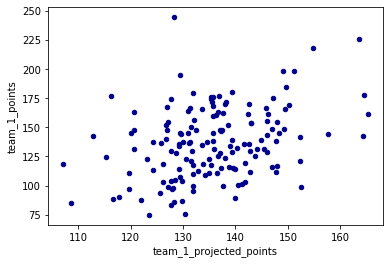

In [205]:
matchupsDf.plot.scatter(x='team_1_projected_points',
                      y='team_1_points',
                      c='DarkBlue')

In [207]:
matchupsDf.to_csv("matchups2019.csv", index=False)

In [209]:
slope, intercept, r_value, p_value, std_err = stats.linregress(matchupsDf["team_1_projected_points"], matchupsDf["team_1_points"])
print("slope: %f    intercept: %f" % (slope, intercept))

slope: 1.003227    intercept: 0.509011


In [211]:
print("R-squared: %f" % r_value**2)

R-squared: 0.120774


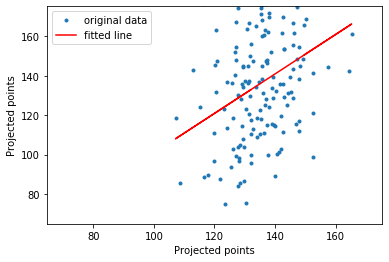

In [218]:
plt.plot(matchupsDf["team_1_projected_points"], matchupsDf["team_1_points"], '.', label='original data')
plt.plot(matchupsDf["team_1_projected_points"], intercept + slope*matchupsDf["team_1_projected_points"], 'r', label='fitted line')
plt.xlabel("Projected points")
plt.ylabel("Projected points")
pointsMin = min(matchupsDf["team_1_projected_points"].min(), matchupsDf["team_1_points"].min())
pointsMax = min(matchupsDf["team_1_projected_points"].max(), matchupsDf["team_1_points"].max())
plt.xlim([pointsMin - 10, pointsMax + 10])
plt.ylim([pointsMin - 10, pointsMax + 10])
plt.legend()
plt.show()